In [362]:
import pandas as pd
import sklearn
import nltk
import re

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import confusion_matrix, accuracy_score

In [363]:
df = pd.read_csv(r"C:\Users\hp\Downloads\a1_RestaurantReviews_HistoricDump.tsv", sep = '\t', quoting  = 3)

In [364]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [365]:
df.shape

(900, 2)

In [366]:
#Check for duplicates and remove them
df.drop_duplicates (inplace = True)

In [367]:
print(f"Shape of the dataframe after duplicates removal: {df.shape}.")

Shape of the dataframe after duplicates removal: (896, 2).


In [368]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [369]:
df['Liked'].value_counts()

1    495
0    401
Name: Liked, dtype: int64

In [370]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
# stopwords_list

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [371]:
stopwords_list.remove('no')
stopwords_list.remove('not')

In [372]:
df['Review'][6]

"Honeslty it didn't taste THAT fresh.)"

# Data Preprocessing

In [373]:
# pip install spacy

In [374]:
#Method to remove html tags
from bs4 import BeautifulSoup
def remove_html_tags(text):
    return BeautifulSoup(text, 'html.parser').get_text()

##Case-Standardization
def to_lowercase(text):
    return text.lower()

##Standardizing Accent Characters
import unicodedata
def standardize_accented_chars(text):
 return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

##Dealing with URLs
def remove_url(text):
 return re.sub(r'https?:\S*', '', text)

##Expanding Contractions
import contractions
def expand_contractions(text):
    expanded_words = [] 
    for word in text.split():
       expanded_words.append(contractions.fix(word)) 
    return ' '.join(expanded_words)

##Removing Mentions and Hashtags
def remove_mentions_and_tags(text):
    text = re.sub(r'@\S*', '', text)
    return re.sub(r'#\S*', '', text)
                  
##Removing Special Characters
def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
    return re.sub(pat, '', text)

##Removing Digits
def remove_numbers(text):
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pattern, '', text)
                  
##Removing Puncuations                 
import string
def remove_punctuation(text):
    return ''.join([c for c in text if c not in string.punctuation])
                  
def get_stem(text):
    stemmer = nltk.porter.PorterStemmer()
    return ' '.join([stemmer.stem(word) for word in text.split()])

def get_lemma(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

#### Stemming is the process of deleting the final few letters of a given word in order to create a shorter variant, even if that form has no significance.

#### For example stemming replaces  “history” and “historical” with “histori”; "cats" with "cat"; "lover", "loved" with "love"

In [375]:
##Using Porter Stemming
cleaned_reviews1 = []
cleaned_reviews2 = []
# nltk.download('wordnet')
# nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

for review in df['Review']:
    review = remove_html_tags(review)
    review = to_lowercase(review)
    review = standardize_accented_chars(review)
    review = remove_url(review)
    review = expand_contractions(review)
    review = remove_mentions_and_tags(review)
    review = remove_special_characters(review)
    review = remove_numbers(review)
    review = remove_punctuation(review)
    review = get_stem(review)
    
    cleaned_reviews1.append(review)
    
df.insert(1, "cleaned_reviews1", cleaned_reviews1)


C:\Users\hp\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


#### The goal of lemmatization is the same as that of stemming, but it solves stemming's shortcomings. For certain words, such as "Histori," stemming may not provide a meaningful representation. Lemmatization comes into play here since it provides meaningful words. These words are called Lemmas. These are usually dictionary words.

#### Lemmatization takes more time as compared to stemming because it finds meaningful word/ representation. Stemming just needs to get a base word and therefore takes less time.

In [376]:
##Using Lemmetizer
for review in df['Review']:
    review = remove_html_tags(review)
    review = to_lowercase(review)
    review = standardize_accented_chars(review)
    review = remove_url(review)
    review = expand_contractions(review)
    review = remove_mentions_and_tags(review)
    review = remove_special_characters(review)
    review = remove_numbers(review)
    review = remove_punctuation(review)
    review = get_lemma(review)
    
    cleaned_reviews2.append(review)
df.insert(2, "cleaned_reviews2", cleaned_reviews2)

C:\Users\hp\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [377]:
df.head()

,Review,cleaned_reviews1,cleaned_reviews2,Liked
0,Wow... Loved this place.,wow love thi place,wow loved this place,1
1,Crust is not good.,crust is not good,crust is not good,0
2,Not tasty and the texture was just nasty.,not tasti and the textur wa just nasti,not tasty and the texture wa just nasty,0
3,Stopped by during the late May bank holiday of...,stop by dure the late may bank holiday off ric...,stopped by during the late may bank holiday of...,1
4,The selection on the menu was great and so wer...,the select on the menu wa great and so were th...,the selection on the menu wa great and so were...,1


In [378]:
y = df.iloc[:, -1].values

# I attempted to evaluate the accuracy of GaussianNB, MultinomialNB, BernoulliNB, SVC, and LogisticRegression models that were trained on normalized text data using Stemmer and Lemmatizer and then vectorized employing Sklearn's CountVectorizer, TF_IDF Vectorizer, and HashVectorizer.

In [379]:
## A method coverts the text to vector matrix as per the vectorizer used.
def vectorize_text(text, vectorizer):
    text_matrix = vectorizer.fit_transform(text)
    return text_matrix.toarray()

## Using CountVectorization

### sklearn.feature_extraction.text.CountVectorizer:
#### Convert a collection of text documents to a matrix of token counts. This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix called "BAG OF WORDS" (or  "Bag of n-grams").

In [354]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(ngram_range = (1,2), max_features = 4096)

In [355]:
X1=vectorize_text(df['cleaned_reviews1'],bow)
X2=vectorize_text(df['cleaned_reviews2'],bow)

In [356]:
pd.DataFrame(X1, columns = bow.get_feature_names())

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,about,about this,above,absolutely,absolutely amazing,absolutely no,acknowledged,actually,added,after,...,yukon,yukon gold,yum,yum sauce,yum yum,yummy,yummy for,yummy you,zero,zero star
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
893,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [357]:
print('X1 Shape:', X1.shape)
print('X2 Shape:', X2.shape)
print('y Shape:', y.shape)

X1 Shape: (896, 4096)
X2 Shape: (896, 4096)
y Shape: (896,)


In [358]:
# Saving BoW dictionary to later use in prediction
import pickle
bow_path = 'c1_BoW_Sentiment_Model.pkl'
pickle.dump(bow, open(bow_path, "wb"))

In [359]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y_train,y_test = train_test_split(X1,y,test_size =0.333, random_state = 42)
X2_train,X2_test,y_train,y_test = train_test_split(X2,y,test_size =0.333, random_state = 42)

In [360]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
classifiers = [GaussianNB(), MultinomialNB(), BernoulliNB(), SVC(), LogisticRegression()]
print("Accuracy scores of models built on data that is text normalized using Stemming Process:")
print(" ")
for classifier in classifiers:
    classifier.fit(X1_train, y_train)
    y_pred = classifier.predict(X1_test)
    print("Accuracy score of {} is:{}".format(classifier, accuracy_score(y_test, y_pred)))
    

Accuracy scores of models built on data that is text normalized using Stemming Process:
 
Accuracy score of GaussianNB() is:0.7625418060200669
Accuracy score of MultinomialNB() is:0.802675585284281
Accuracy score of BernoulliNB() is:0.7090301003344481
Accuracy score of SVC() is:0.7424749163879598
Accuracy score of LogisticRegression() is:0.822742474916388


In [361]:
print("Accuracy scores of models built on data that is text normalized using Lemmatzing Proces:")
print(" ")
for classifier in classifiers:
    classifier.fit(X2_train, y_train)
    y_pred = classifier.predict(X2_test)
    print("Accuracy score of {} is:{}".format(classifier, accuracy_score(y_test, y_pred)))

Accuracy scores of models built on data that is text normalized using Lemmatzing Proces:
 
Accuracy score of GaussianNB() is:0.7591973244147158
Accuracy score of MultinomialNB() is:0.8060200668896321
Accuracy score of BernoulliNB() is:0.7090301003344481
Accuracy score of SVC() is:0.7391304347826086
Accuracy score of LogisticRegression() is:0.7959866220735786


## Using tf-idfVectorization

### sklearn.feature_extraction.text.TfidfVectorizer:

#### Convert a collection of raw documents to a matrix of TF-IDF features. Tf means term-frequency while tf–idf means term-frequency times inverse document-frequency: 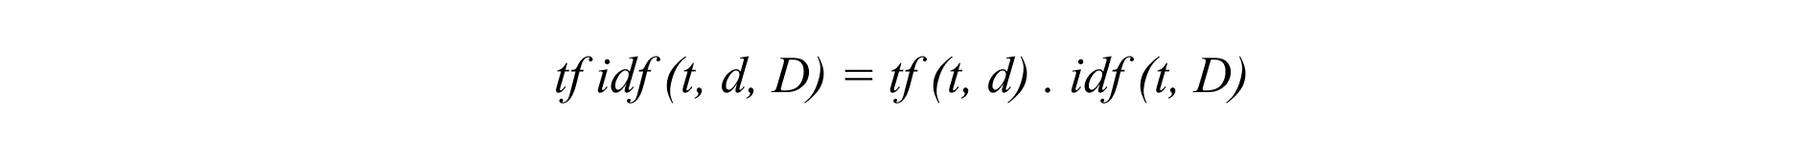
#### where, 
#### The term frequency of a word in a document: 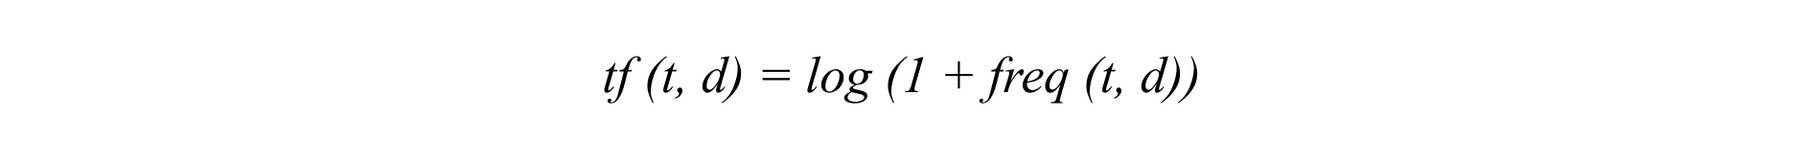
#### The inverse document frequency of the word across a set of documents. This means, how common or rare a word is in the entire document set: 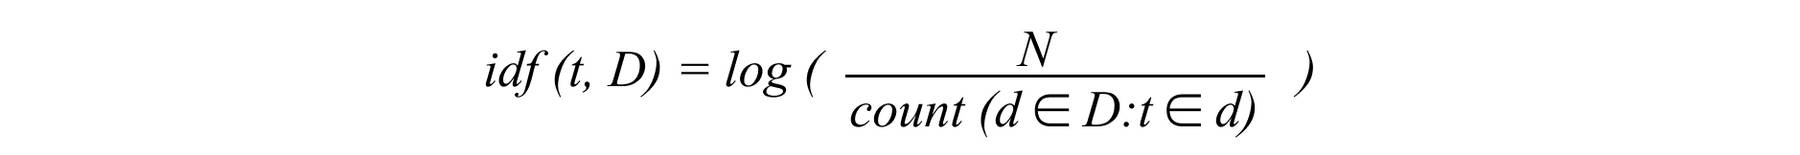
#### If the word is very common and appears in many documents, this number will approach 0. Otherwise, it will approach 1

In [380]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(ngram_range = (1,2), max_features = 4096)

In [381]:
X1=vectorize_text(df['cleaned_reviews1'],tf_idf)
X2=vectorize_text(df['cleaned_reviews2'],tf_idf)

In [382]:
pd.DataFrame(X1, columns = tf_idf.get_feature_names())

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,about,about this,above,absolutely,absolutely amazing,absolutely no,acknowledged,actually,added,after,...,yukon,yukon gold,yum,yum sauce,yum yum,yummy,yummy for,yummy you,zero,zero star
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [383]:
print('X1 Shape:', X1.shape)
print('X2 Shape:', X2.shape)
print('y Shape:', y.shape)

X1 Shape: (896, 4096)
X2 Shape: (896, 4096)
y Shape: (896,)


In [384]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y_train,y_test = train_test_split(X1,y,test_size =0.333, random_state = 42)
X2_train,X2_test,y_train,y_test = train_test_split(X2,y,test_size =0.333, random_state = 42)

In [385]:
print("Accuracy scores of models built on data that is text normalized using Stemming Process:")
print(" ")

for classifier in classifiers:
    classifier.fit(X1_train, y_train)
    y_pred = classifier.predict(X1_test)
    print("Accuracy score of {} is:{}".format(classifier, accuracy_score(y_test, y_pred)))

Accuracy scores of models built on data that is text normalized using Stemming Process:
 
Accuracy score of GaussianNB() is:0.7424749163879598
Accuracy score of MultinomialNB() is:0.7558528428093646
Accuracy score of BernoulliNB() is:0.7090301003344481
Accuracy score of SVC() is:0.7324414715719063
Accuracy score of LogisticRegression() is:0.7357859531772575


In [386]:
print("Accuracy scores of models built on data that is text normalized using Lemmatizing Process:")
print(" ")
for classifier in classifiers:
    classifier.fit(X2_train, y_train)
    y_pred = classifier.predict(X2_test)
    print("Accuracy score of {} is:{}".format(classifier, accuracy_score(y_test, y_pred)))

Accuracy scores of models built on data that is text normalized using Lemmatizing Process:
 
Accuracy score of GaussianNB() is:0.7591973244147158
Accuracy score of MultinomialNB() is:0.7558528428093646
Accuracy score of BernoulliNB() is:0.7090301003344481
Accuracy score of SVC() is:0.7424749163879598
Accuracy score of LogisticRegression() is:0.745819397993311


## Using HashingVectorizer

### sklearn.feature_extraction.FeatureHasher:
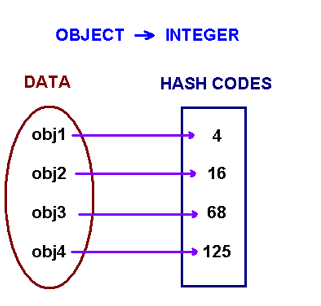
#### Implements feature hashing, aka the hashing trick. This class turns sequences of symbolic feature names (strings) into scipy.sparse matrices, using a hash function to compute the matrix column corresponding to a name. The hash function employed is the signed 32-bit version of Murmurhash3.
#### Hash value of the sentence is divided by 2^b and the remainder is taken as the index. There will 2^b indeces. These indeces are the features of the matrix.
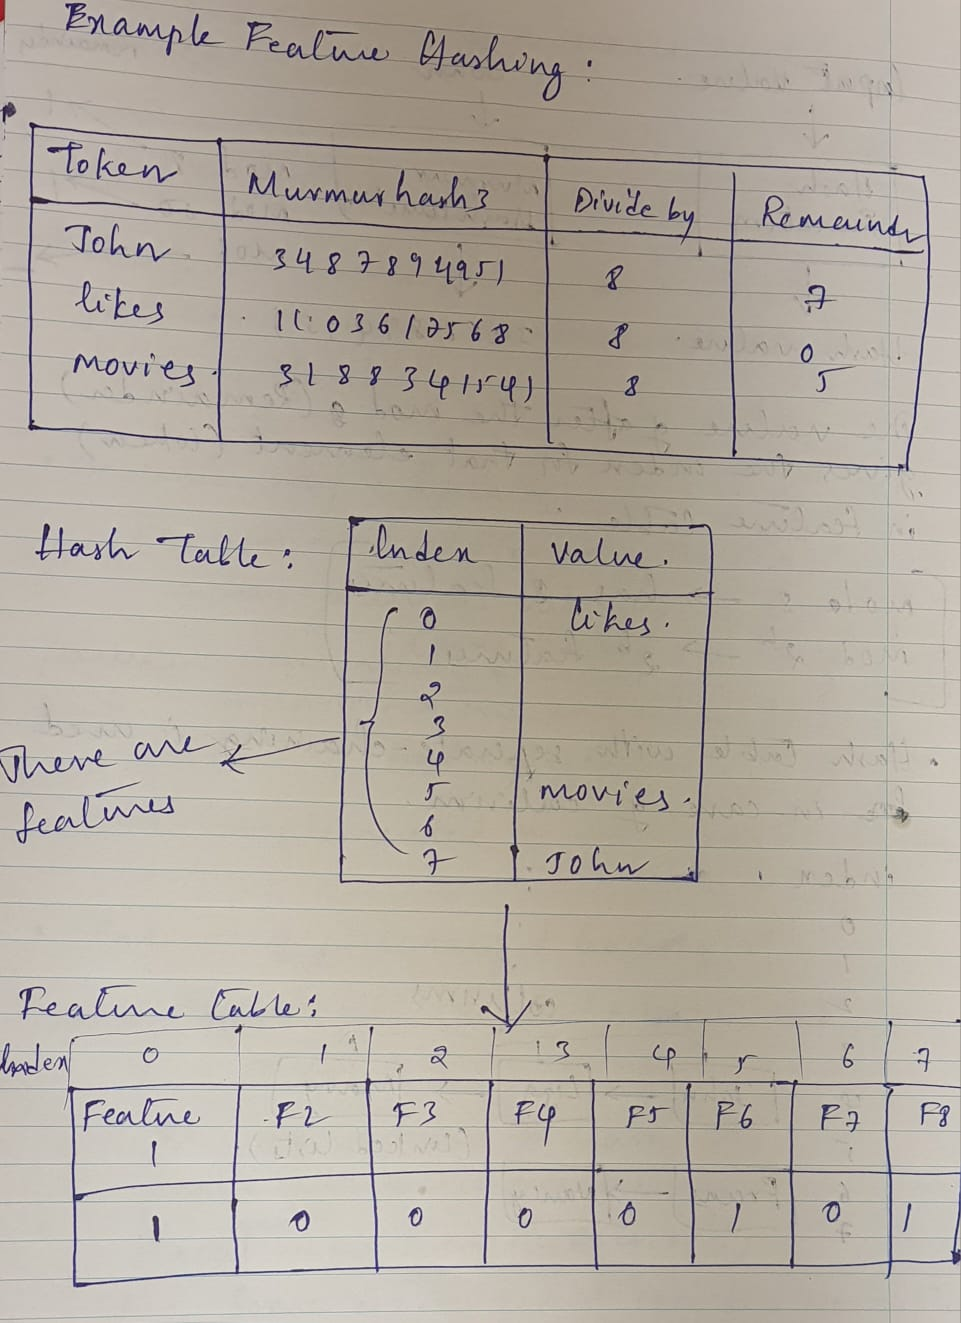

In [345]:
from sklearn.feature_extraction.text import HashingVectorizer
hasher =HashingVectorizer(ngram_range = (1,2), n_features = 4096) #2**12 = 4096

##### n_featuresint, default=(2 ** 20)
The number of features (columns) in the output matrices. Small numbers of features are likely to cause hash collisions, but large numbers will cause larger coefficient dimensions in linear learners.

In [346]:
X1=vectorize_text(df['cleaned_reviews1'],hasher)
X2=vectorize_text(df['cleaned_reviews2'],hasher)

In [347]:
X1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#pd.DataFrame(X1, columns = hasher.get_feature_names())

In [348]:
print('X1 Shape:', X1.shape)
print('X2 Shape:', X2.shape)
print('y Shape:', y.shape)

X1 Shape: (896, 4096)
X2 Shape: (896, 4096)
y Shape: (896,)


In [349]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y_train,y_test = train_test_split(X1,y,test_size =0.333, random_state = 42)
X2_train,X2_test,y_train,y_test = train_test_split(X2,y,test_size =0.333, random_state = 42)

In [350]:
print("Accuracy scores of models built on data that is text normalized using Stemming Process:")
print(" ")
classifiers = [GaussianNB(), BernoulliNB(), SVC(), LogisticRegression()]
for classifier in classifiers:
    classifier.fit(X1_train, y_train)
    y_pred = classifier.predict(X1_test)
    print("Accuracy score of {} is:{}".format(classifier, accuracy_score(y_test, y_pred)))

Accuracy scores of models built on data that is text normalized using Stemming Process:
 
Accuracy score of GaussianNB() is:0.6722408026755853
Accuracy score of BernoulliNB() is:0.6086956521739131
Accuracy score of SVC() is:0.7424749163879598
Accuracy score of LogisticRegression() is:0.7190635451505016


In [351]:
print("Accuracy scores of models built on data that is text normalized using Lemmatizing Process:")
print(" ")
for classifier in classifiers:
    classifier.fit(X2_train, y_train)
    y_pred = classifier.predict(X2_test)
    print("Accuracy score of {} is:{}".format(classifier, accuracy_score(y_test, y_pred)))

Accuracy scores of models built on data that is text normalized using Lemmatizing Process:
 
Accuracy score of GaussianNB() is:0.6488294314381271
Accuracy score of BernoulliNB() is:0.6020066889632107
Accuracy score of SVC() is:0.745819397993311
Accuracy score of LogisticRegression() is:0.7357859531772575


##  

## Inferences:

#### 1. It can be seen that models MultinomialNB and LogisticRegression performed better above all, in case of Count vectorization.
#### 2. Stemming is better with Countvector narmalization technique.
#### 3. Lemmazation is better with tf_idf vectorization.
#### 4. Irrespective of Stemming or Lemmatizing and Bag words techqniue or Tf_idf vectorizations Bernoulli Naive Bayes model perfromed the same with an accuracy score of ##### 0.7090301003344481.
#### 5. It is observed that with Hashing technique there are diffficulties in building MultinomialNB model.
#### 6. Models built on hash vectorized data performs least for SENTIMENT ANALYSIS.
#### 7. Stemming + CountVectorizer is best suited for Sentiment Analysis.